In [1]:
import networkx as nx
import matplotlib.pyplot as plt 

import sys 
sys.path.append('..')
import quarantines as Q 
import utils

In [2]:
data_path = './facebook_combined.txt'
G_social = nx.read_edgelist(data_path)


In [3]:
dict(G_social.degree)

{'0': 347,
 '1': 17,
 '2': 10,
 '3': 17,
 '4': 10,
 '5': 13,
 '6': 6,
 '7': 20,
 '8': 8,
 '9': 57,
 '10': 10,
 '11': 1,
 '12': 1,
 '13': 31,
 '14': 15,
 '15': 1,
 '16': 9,
 '17': 13,
 '18': 1,
 '19': 16,
 '20': 15,
 '21': 65,
 '22': 11,
 '23': 17,
 '24': 16,
 '25': 69,
 '26': 68,
 '27': 5,
 '28': 13,
 '29': 13,
 '30': 17,
 '31': 23,
 '32': 6,
 '33': 2,
 '34': 5,
 '35': 2,
 '36': 11,
 '37': 1,
 '38': 9,
 '39': 15,
 '40': 44,
 '41': 24,
 '42': 2,
 '43': 1,
 '44': 6,
 '45': 12,
 '46': 5,
 '47': 2,
 '48': 22,
 '49': 4,
 '50': 11,
 '51': 7,
 '52': 2,
 '53': 31,
 '54': 8,
 '55': 17,
 '56': 78,
 '57': 15,
 '58': 12,
 '59': 19,
 '60': 8,
 '61': 3,
 '62': 26,
 '63': 6,
 '64': 7,
 '65': 12,
 '66': 15,
 '67': 76,
 '68': 9,
 '69': 10,
 '70': 2,
 '71': 3,
 '72': 24,
 '73': 10,
 '74': 1,
 '75': 14,
 '76': 3,
 '77': 6,
 '78': 9,
 '79': 12,
 '80': 23,
 '81': 3,
 '82': 34,
 '83': 7,
 '84': 13,
 '85': 14,
 '86': 6,
 '87': 13,
 '88': 20,
 '89': 8,
 '90': 2,
 '91': 8,
 '92': 21,
 '93': 8,
 '94': 22,
 '95'

In [4]:
tau = 0.15 
gamma = 1.0
rho = 0.005 



In [9]:
final_rs = {}
max_is = {}
for p in [_ / 100 for _ in range(0, 80)]:
    print("WORKING ON PROP ", p)
    agg = Q.quarantine_by_prop(G_social, tau, gamma, rho, p, float('inf'), num_iter=5)
    final_rs[p] = agg.get_final_R()
    max_is[p] = agg.get_max_I()

WORKING ON PROP  0.0
WORKING ON PROP  0.01
WORKING ON PROP  0.02
WORKING ON PROP  0.03
WORKING ON PROP  0.04
WORKING ON PROP  0.05
WORKING ON PROP  0.06
WORKING ON PROP  0.07
WORKING ON PROP  0.08
WORKING ON PROP  0.09
WORKING ON PROP  0.1
WORKING ON PROP  0.11
WORKING ON PROP  0.12
WORKING ON PROP  0.13
WORKING ON PROP  0.14
WORKING ON PROP  0.15
WORKING ON PROP  0.16
WORKING ON PROP  0.17
WORKING ON PROP  0.18
WORKING ON PROP  0.19
WORKING ON PROP  0.2
WORKING ON PROP  0.21
WORKING ON PROP  0.22
WORKING ON PROP  0.23
WORKING ON PROP  0.24
WORKING ON PROP  0.25
WORKING ON PROP  0.26
WORKING ON PROP  0.27
WORKING ON PROP  0.28
WORKING ON PROP  0.29
WORKING ON PROP  0.3
WORKING ON PROP  0.31
WORKING ON PROP  0.32
WORKING ON PROP  0.33
WORKING ON PROP  0.34
WORKING ON PROP  0.35
WORKING ON PROP  0.36
WORKING ON PROP  0.37
WORKING ON PROP  0.38
WORKING ON PROP  0.39
WORKING ON PROP  0.4
WORKING ON PROP  0.41
WORKING ON PROP  0.42
WORKING ON PROP  0.43
WORKING ON PROP  0.44
WORKING ON PROP

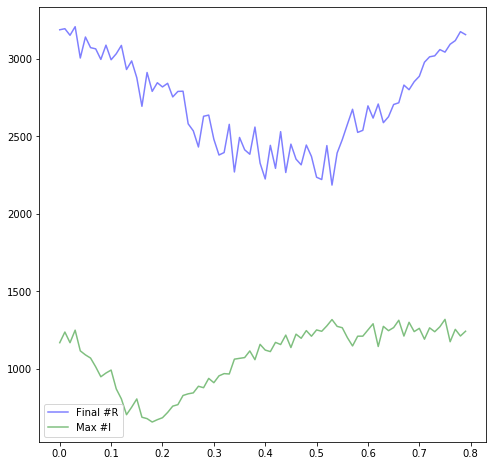

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(*zip(*sorted(final_rs.items())), c='b', alpha=0.5, label='Final #R')
ax.plot(*zip(*sorted(max_is.items())), c='g', alpha=0.5, label='Max #I')
ax.legend()


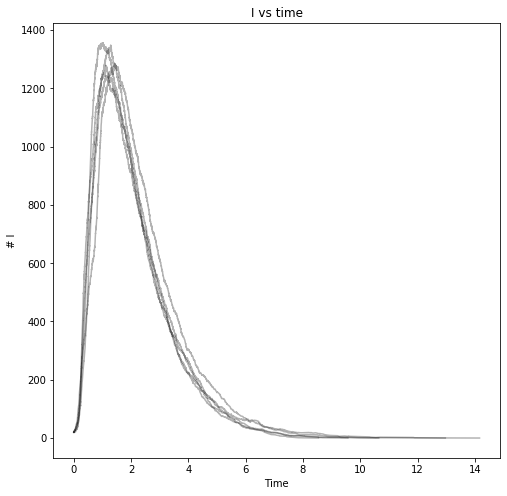

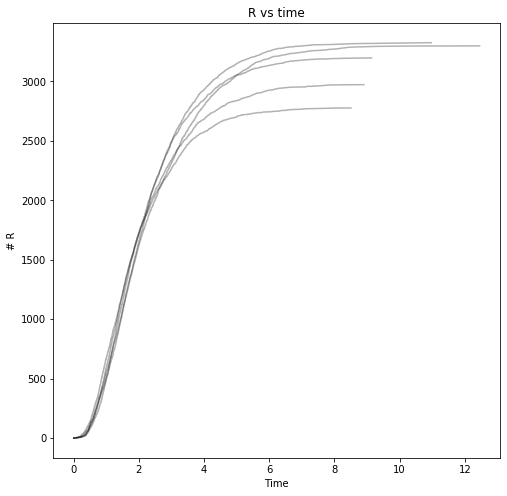

In [14]:
Q.plot_vanilla_run(G_social, tau, gamma, rho, float('inf'))

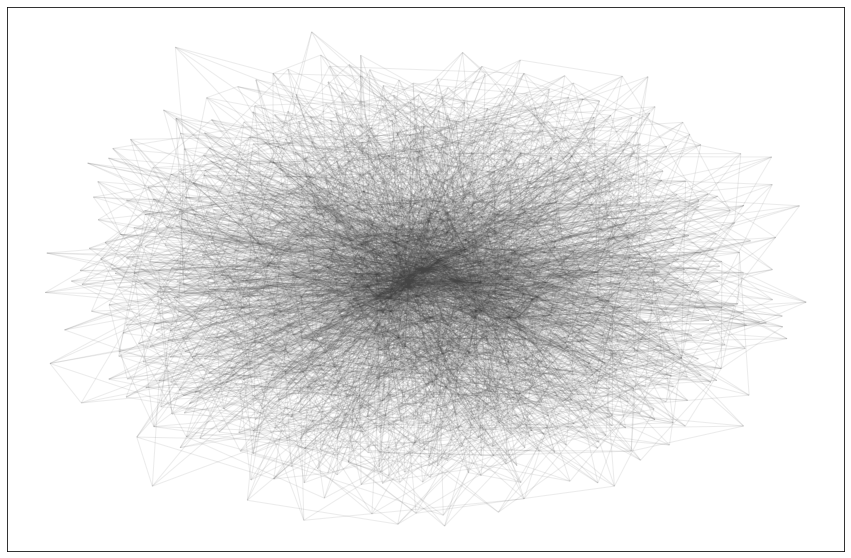

In [20]:
G= nx.barabasi_albert_graph(1000, 5)
pos = nx.spring_layout(G, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
        G, 
        pos=pos, 
        node_size=0, 
        edge_color="#444444", 
        alpha=0.1, 
        with_labels=False)

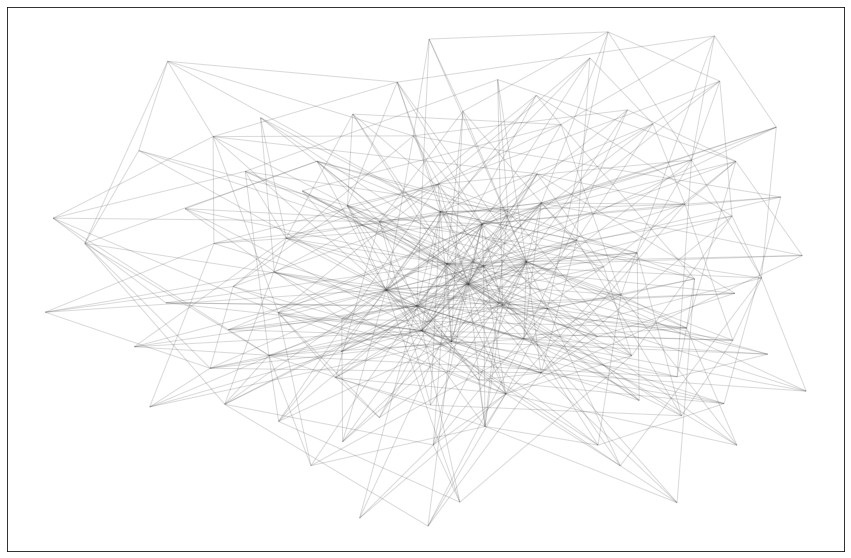

In [25]:
G= nx.powerlaw_cluster_graph(100, 5, 0.2)
pos = nx.spring_layout(G, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
        G, 
        pos=pos, 
        node_size=0, 
        edge_color="#444444", 
        alpha=0.2, 
        with_labels=False)

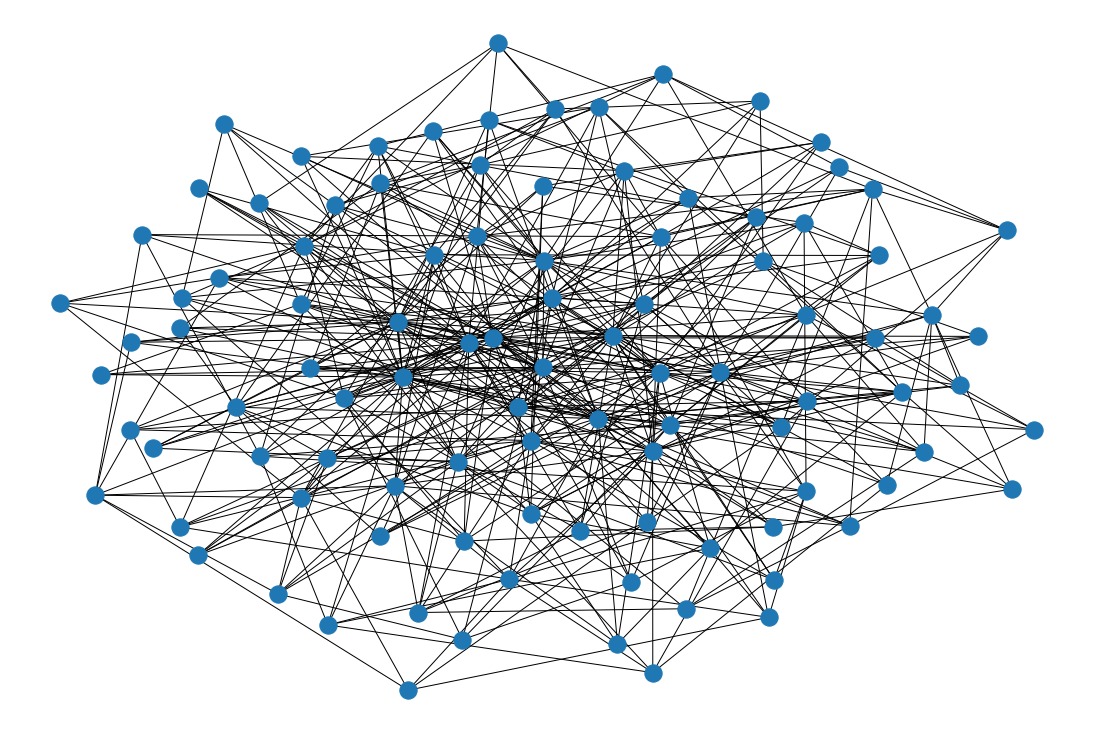

In [26]:
nx.draw_kamada_kawai(G)